<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


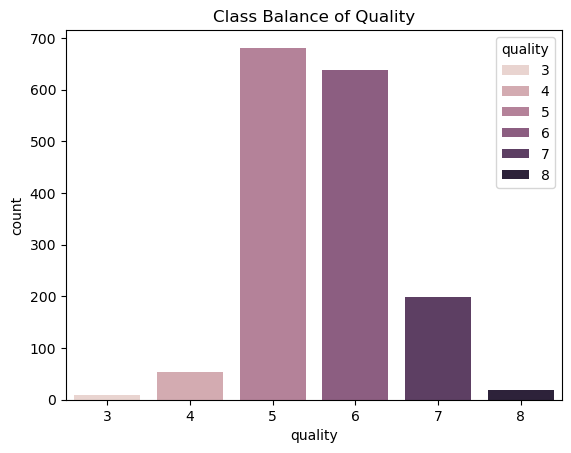

In [25]:
# Test Work
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../../data/winequality-red.csv')
# y = quality
df.info()

# Class balance
sns.countplot(x='quality', data=df, hue='quality')
plt.title('Class Balance of Quality')
plt.show()

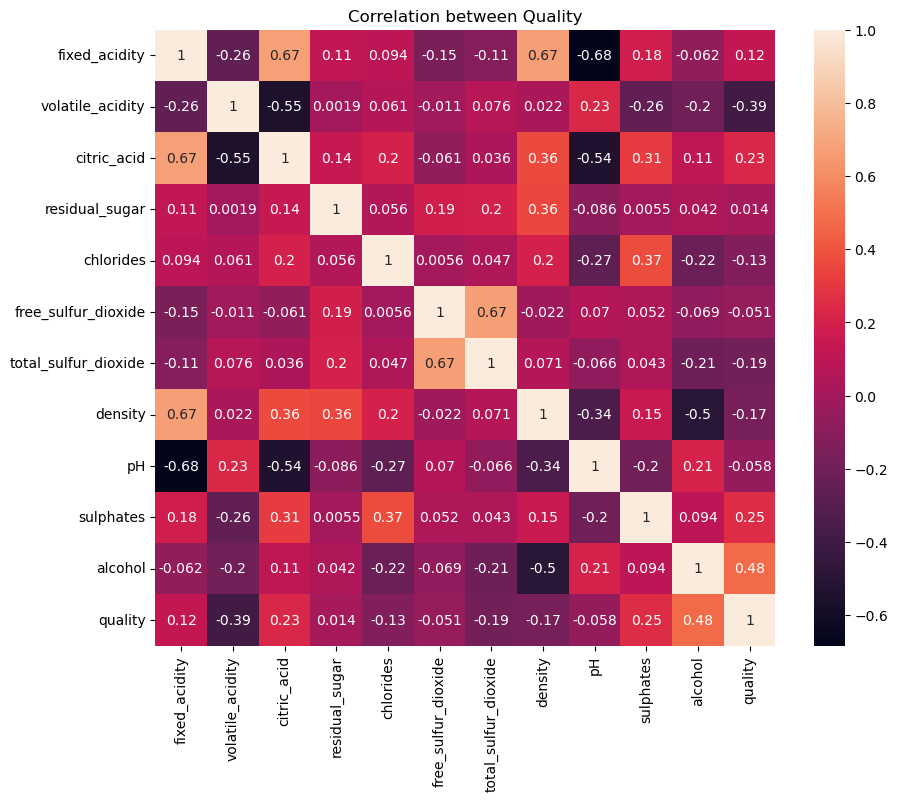

In [26]:
#Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title('Correlation between Quality')
plt.show()

                 Feature     F-Score
10               alcohol  115.854797
1       volatile_acidity   60.913993
6   total_sulfur_dioxide   25.478510
9              sulphates   22.273376
2            citric_acid   19.690664
7                density   13.396357
0          fixed_acidity    6.283081
4              chlorides    6.035639
5    free_sulfur_dioxide    4.754233
8                     pH    4.341764
3         residual_sugar    1.053374
train: 0.5847
test: 0.6075


c:\Users\rhbyr\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


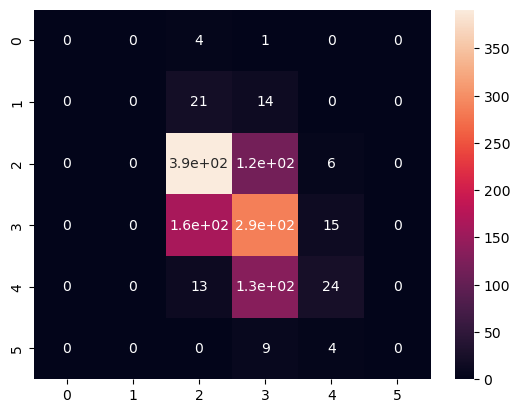

In [27]:
# SelectkBest
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

X = df.drop(columns=['quality'])
y = df['quality']

selector = SelectKBest(score_func=f_classif, k="all")
selector.fit(X, y)

scores = pd.DataFrame({
    "Feature": X.columns,
    "F-Score": selector.scores_
}).sort_values(by="F-Score", ascending=False)

print(scores)

# Train test scores
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)

model = LogisticRegression()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f'train: {train_score:.4f}')
print(f'test: {test_score:.4f}')

cmat = confusion_matrix(y_train, model.predict(X_train))
sns.heatmap(cmat, annot=True)
plt.show()


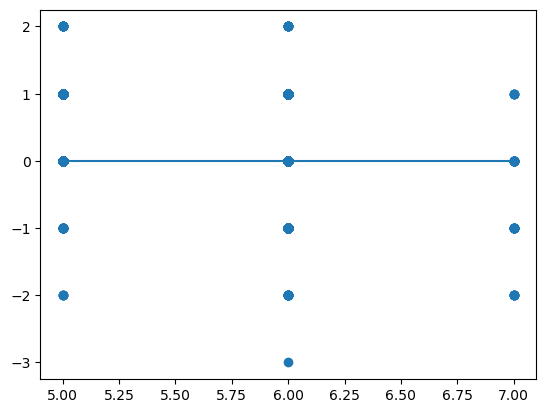

In [28]:
# Residual plot
preds = model.predict(X_train)
# order is important!  actual - predictions
plt.scatter(preds, y_train-preds)
plt.hlines(y=0, xmin=preds.min(), xmax=preds.max())
plt.show()